$$
\LARGE \text{Statistical learning theory and Data Science (DS6264), Spring-2025, IISER Pune}
$$

$$
\large \text{Bapi Basak}
$$

$$
\large \text{Reg No: 20243714}
$$


In [2]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

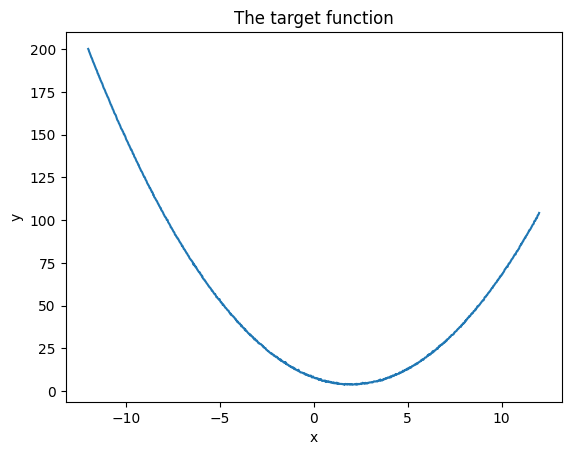

In [3]:
def fnc(x,Np):   # Np is number of data points to be generated from the target function. 
#If you want to generate a single data point put Np=1. If you want to plot the target function put higher value of Np.
    Noise = np.random.normal(0,0.2,Np)
    return (x-2)**2 + 4 + Noise
plt.title("The target function")
# plt.xlim(0,4)
# plt.ylim(0,10)
plt.xlabel("x")
plt.ylabel("y")
# plt.scatter(x,y)
x = np.linspace (-12,12,1000)
plt.plot(x,fnc(x,1000))

For three data point, the in sample mean square error for Hypothesis $\mathcal{H}_1$ is defined as,
$$
E_{in}(g)=\sum_{i=1}^{3} \left[ f(x_i)-g(x_i) \right]^2=\sum_{i=1}^{3} \left[ (x_i - 2)^2 + 4 - (a x_i + b) \right]^2
$$

We can find the value of a and b that minimizes the $E_{in}(g)$ by taking the derivative of $E_{in}(g)$ with respect to a and b and equate it to zero.

$$
\frac{\partial}{\partial a}\sum_{i=1}^{3} \left[ (x_i - 2)^2 + 4 - (a x_i + b) \right]^2=0
$$


$$
\sum_{i=1}^{3} x_i\left[ (x_i - 2)^2 + 4 - (a x_i + b) \right]=0
$$

$$
x_1(x_1-2)^2+x_2(x_2-2)^2+x_3(x_3-2)^2+4(x_1+x_2+x_3)-a(x_1^2+x_2^2+x_3^2)-b(x_1+x_2+x_3)=0\ \   (1)
$$

and


$$
\frac{\partial}{\partial b}\sum_{i=1}^{3} \left[ (x_i - 2)^2 + 4 - (a x_i + b) \right]^2=0
$$


$$
\sum_{i=1}^{3} \left[ (x_i - 2)^2 + 4 - (a x_i + b) \right]=0
$$

$$
(x_1-2)^2+(x_2-2)^2+(x_3-2)^2-a(x_1+x_2+x_3)-3b+12=0\ \   (2)
$$

From equation (1) and (2), we can solve for a,

$$
a=\frac{\frac{(x_1-2)^2+(x_2-2)^2+(x_3-2)^2+12}{3}-\frac{x_1(x_1-2)^2+x_3(x_3-2)^2+x_3(x_3-2)^2+4(x_1+x_2+x_3)}{x_1+x_2+x_3}}{\frac{x_1+x_2+x_3}{3}-\frac{x_1^2+x_2^2+x_3^2}{x_1+x_2+x_3}}
$$

Putting the value of a in equation(2) we can find the value of equation b.

Similarly for Hypothesis $\mathcal{H}_0$ we put $a=0$ and then get the value of b to be,
$$
b=\frac{(x_1-2)^2+(x_2-2)^2+(x_3-2)^2+12}{3}
$$

In [4]:
def h_func0(x,x_1,x_2,x_3):
    b = ((((x_1-2)**2)+((x_2-2)**2)+((x_3-2)**2)+12))/3
    return b

In [5]:
def h_func1(x,x_1,x_2,x_3):
    term_1 = (((x_1-2)**2)+((x_2-2)**2)+((x_3-2)**2)+12)/3
    term_2 = ((x_1*(x_1-2)**2)+(x_2*(x_2-2)**2)+(x_3*(x_3-2)**2)+4*(x_1+x_2+x_3))/(x_1+x_2+x_3)
    term_3 = (((x_1+x_2+x_3)/3)-(((x_1**2)+(x_2**2)+(x_3**2))/(x_1+x_2+x_3)))
    a = (term_1-term_2)/term_3
    b = ((((x_1-2)**2)+((x_2-2)**2)+((x_3-2)**2)+12) -(a*(x_1+x_2+x_3)))/3
    return a,b,a*x+b

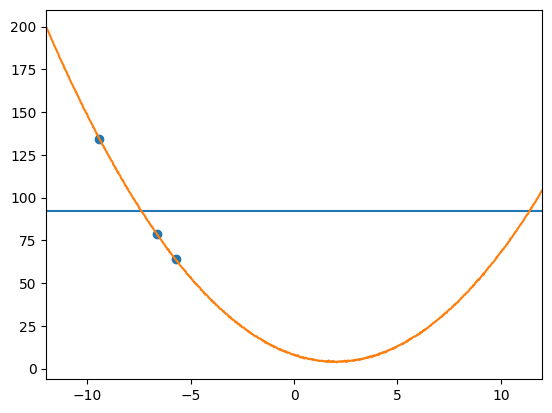

In [10]:
# np.random.seed(123723)
xl = np.random.uniform(-10,10,3)
yl = fnc(xl,3)
# def mse(params):
#     a,b = params
#     return np.sum((yl-((a*xl)+b))**2)/3
# initial_guess = [0, 0]
# result = minimize(mse, initial_guess)
# a_opt = result.x[0]
# b_opt = result.x[1]
# print(yl)
# print (a_opt,b_opt)
h0func = h_func0(x,xl[0],xl[1],xl[2])*np.ones(1000)

plt.scatter(xl,yl)
plt.xlim(-12,12)
plt.plot(x,h0func)
plt.plot(x,fnc(x,1000))

The best model under class H_0 in the average sense which best approximates the target function is : h(x) = 39.18059296288968


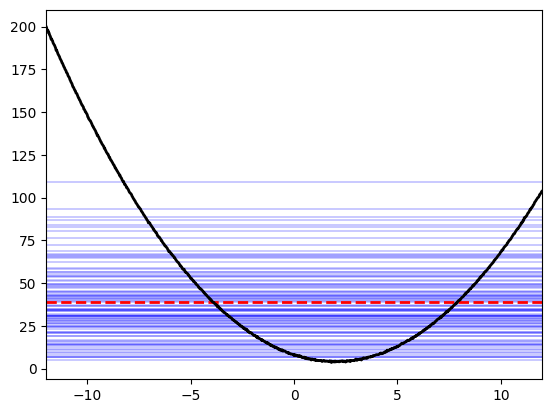

In [11]:
np.random.seed(123456)
x = np.linspace (-12,12,1000)
n_dataset = 100
b_list = []
hfunc = np.zeros(1000)
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    # yl = fnc(xl,3)
    # def mse(params):
    #     a,b = params
    #     return np.sum((yl-((a*xl)+b))**2)/3
    # initial_guess = [0, 0]
    # result = minimize(mse, initial_guess)
    # a_opt = result.x[0]
    # b_opt = result.x[1]
    v = h_func0(x,xl[0],xl[1],xl[2])*np.ones(1000)
    hfunc = hfunc + v
    plt.xlim(-12,12)
    plt.plot(x,v,c='b',lw=0.3)
# a = np.mean(a_list)
# b = np.mean(b_list)
avg_h0 = hfunc/n_dataset
plt.xlim(-12,12)
plt.plot(x,avg_h0,ls = '--',c='r',lw=2)
plt.plot(x,fnc(x,1000),lw=2,c='k')

print("The best model under class H_0 in the average sense which best approximates the target function is : h(x) = {}".format(avg_h0[0]))

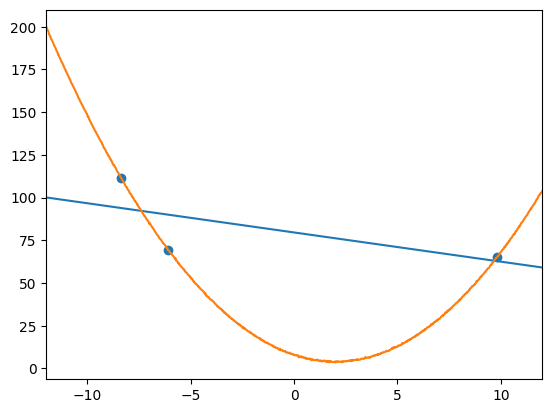

In [17]:
# np.random.seed(123723)
xl = np.random.uniform(-10,10,3)
yl = fnc(xl,3)
# def mse(params):
#     a,b = params
#     return np.sum((yl-((a*xl)+b))**2)/3
# initial_guess = [0, 0]
# result = minimize(mse, initial_guess)
# a_opt = result.x[0]
# b_opt = result.x[1]
# print(yl)
# print (a_opt,b_opt)
_,_,h1func = h_func1(x,xl[0],xl[1],xl[2])

plt.scatter(xl,yl)
plt.xlim(-12,12)
plt.plot(x,h1func)
plt.plot(x,fnc(x,1000))

The best model under class H_1 in the average sense which best approximates the target function is : h(x) = 0.9492913604931771x+38.117503194342106


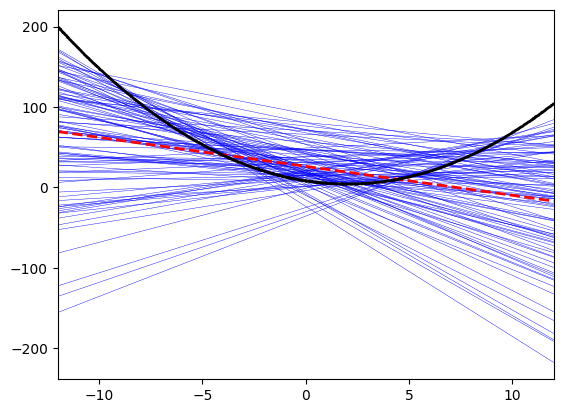

In [18]:
np.random.seed(123456)
x = np.linspace (-12,12,1000)
n_dataset = 100
a_list = []
b_list = []
hfunc = np.zeros(1000)
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    # yl = fnc(xl,3)
    # def mse(params):
    #     a,b = params
    #     return np.sum((yl-((a*xl)+b))**2)/3
    # initial_guess = [0, 0]
    # result = minimize(mse, initial_guess)
    # a_opt = result.x[0]
    # b_opt = result.x[1]
    a,b,v = h_func1(x,xl[0],xl[1],xl[2])
    a_list.append(a)
    b_list.append(b)
    hfunc = hfunc + v
    plt.xlim(-12,12)
    plt.plot(x,v,c='b',lw=0.3)
# a = np.mean(a_list)
# b = np.mean(b_list)
avg_h1 = hfunc/n_dataset
ac = np.mean(a_list)
bc = np.mean(b_list)
plt.xlim(-12,12)
plt.plot(x,avg_h1,ls = '--',c='r',lw=2)
plt.plot(x,fnc(x,1000),lw=2,c='k')

print("The best model under class H_1 in the average sense which best approximates the target function is : h(x) = {}x+{}".format(a,b))

In [19]:
# np.random.seed(123456)

# def avg_bias_var_x(x, n_dataset):
#     pred_list = []
#     for i in range(n_dataset):
#         xl = np.random.uniform(-10,10,3)
#         # yl = fnc(xl,3)
#         # # yl = fnc2(xl)
#         # def mse(params):
#         #     a,b = params
#         #     return np.sum((yl-((a*xl)+b))**2)/3
#         # initial_guess = [0, 0]
#         # result = minimize(mse, initial_guess)
#         # a_opt = result.x[0]
#         # b_opt = result.x[1]
#         _,_,pred = h_func1(x,xl[0],xl[1],xl[2])
#         pred_list.append(pred)
#     avg_fnc = np.mean(pred_list)
#     bias_x = (avg_fnc-fnc(x,3))**2
#     var = np.var(pred_list)
#     return avg_fnc, bias_x, var
    

# def exp_bias_var_eout(sample_size):
#     Bias_list = []
#     Var_list = []
#     for i in range(sample_size):
#         x = np.random.uniform(-10,10,3)
#         avG, Bias, Var = avg_bias_var_x(x,1000)
#         Bias_list.append(Bias)
#         Var_list.append(Var)
#     Ex_Bias = np.mean(Bias_list)
#     Ex_Var = np. mean(Var_list)
#     return Ex_Bias, Ex_Var

# ex_bias, ex_var = exp_bias_var_eout(1000)

# print(ex_bias, ex_var)

In [20]:
def h_fnc1(x,x_1,x_2,x_3):
    term_1 = (((x_1-2)**2)+((x_2-2)**2)+((x_3-2)**2)+12)/3
    term_2 = ((x_1*(x_1-2)**2)+(x_2*(x_2-2)**2)+(x_3*(x_3-2)**2)+4*(x_1+x_2+x_3))/(x_1+x_2+x_3)
    term_3 = (((x_1+x_2+x_3)/3)-(((x_1**2)+(x_2**2)+(x_3**2))/(x_1+x_2+x_3)))
    a = (term_1-term_2)/term_3
    b = ((((x_1-2)**2)+((x_2-2)**2)+((x_3-2)**2)+12) -(a*(x_1+x_2+x_3)))/3
    return a*x+b

In [50]:
# First calculate the bias and variance at a particular point x
def avg_bias_var_x(x, h_fnc, num_datasets, target_fnc):
    bias_x = 0 
    h_fnc_list = []
    for i in range(num_datasets):
        x1, x2, x3 = np.random.uniform(-10, 10, 3)
        v = h_fnc(x, x1, x2, x3)
        h_fnc_list.append(v)
        
    avg_hfnc_x = np.mean(h_fnc_list)
    bias_x = (avg_hfnc_x - target_fnc(x))**2
    var_hfnc_x = np.var(h_fnc_list)
    return avg_hfnc_x, var_hfnc_x, bias_x
# Then Compute the expected value of bias, variance, and out-of-sample error for all the datasets
def exp_Bias_Var_Eout(h_fnc, target_fnc, num_datasets):
    print("--------------Please be patient. It will take around 1 min----------")
    var_list, bias_list, Eout_list = [], [], []
    for i in range(1000):
        x = np.random.uniform(-10, 10, 1)
        av, var, bias = avg_bias_var_x(x, h_fnc, num_datasets, target_fnc)
        var_list.append(var)
        bias_list.append(bias)

        # Find the Expected value of out-of-sample error
        Eout_x_list = []
        for i in range(num_datasets):
            x1, x2, x3 = np.random.uniform(-10, 10, 3)
            v= h_fnc(x, x1, x2, x3)
            Eout_x_list.append((v-target_fnc(x))**2) 

        Eout_x_avg = np.mean(Eout_x_list)
        Eout_list.append(Eout_x_avg)



    Var = np.mean(var_list)    
    Bias = np.mean(bias_list)
    Eout = np.mean(Eout_list)
    print('The bias component is: ', Bias)
    print('The variance component is: ', Var)
    print('The expected out-of-sample error is: ', Eout)
    print('The sum of variance+bias is: ', Var+Bias)
    print("-------------------------------Plotting-----------------------------------") 


    X_List = np.arange(-10, 10, 0.01)
    tar_fnc, avg_fnc, var_hfnc, upper_bound, lower_bound = [],[], [], [], []
    for x in X_List:
        tar_fnc.append(target_fnc(x))
        mean_h, Var_h, Bias_h = avg_bias_var_x(x, h_fnc, num_datasets, target_fnc)
        avg_fnc.append(mean_h)
        var_hfnc.append(Var_h)
        upper_bound.append(mean_h + np.sqrt(Var_h))
        lower_bound.append(mean_h - np.sqrt(Var_h))   

    plt.plot(X_List, tar_fnc, color='black', label='Target Function f(x)')
    plt.plot(X_List, avg_fnc, color='red', label='Average Hypothesis h_bar')
    plt.plot(X_List, upper_bound, color='green', label='Upper bound of h(x)')
    plt.plot(X_List, lower_bound, color='green', label='Lower bound of h(x)')
    plt.xlabel('x')
    plt.fill_between(X_List, upper_bound, lower_bound, color="gray", alpha=0.3, label="Filled Region")
    plt.legend()

Hypothesis class: h(x) = b
--------------Please be patient. It will take around 1 min----------
The bias component is:  1353.8983937633643
The variance component is:  473.69772955275255
The expected out-of-sample error is:  1830.9185665932375
The sum of variance+bias is:  1827.596123316117
-------------------------------Plotting-----------------------------------


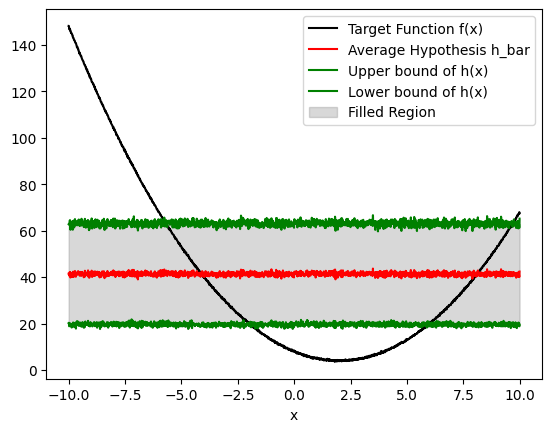

In [51]:
num_datasets = 1000
print('Hypothesis class: h(x) = b')

exp_Bias_Var_Eout(h_func0, lambda x: (x-2)**2 + 4 + np.random.normal(0,0.2,1), num_datasets)    
plt.show()

Hypothesis class: h(x) = ax+b
--------------Please be patient. It will take around 1 min----------
The bias component is:  1206.6453952339928
The variance component is:  2083.4242147269556
The expected out-of-sample error is:  3274.710713103751
The sum of variance+bias is:  3290.0696099609486
-------------------------------Plotting-----------------------------------


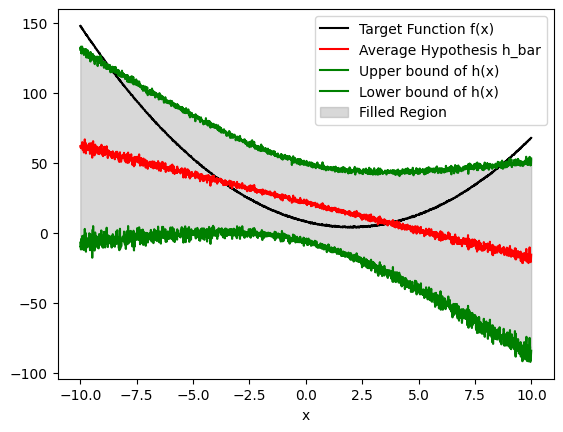

In [52]:
num_datasets = 1000
print('Hypothesis class: h(x) = ax+b')

exp_Bias_Var_Eout(h_fnc1, lambda x: (x-2)**2 + 4 + np.random.normal(0,0.2,1), num_datasets)    
plt.show()